In [6]:
import numpy as np
import pandas as pd
from scipy.io import mmread

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 4)

# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# import anndata as ad
# import scanpy as sc
# import maxfuse as mf

import seaborn as sns

In [1]:
import requests, zipfile, io
r = requests.get("http://stat.wharton.upenn.edu/~zongming/maxfuse/data.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("../")

In [5]:
# read in protein data
protein = pd.read_csv("data/data_mf/tonsil/tonsil_codex.csv") # ~178,000 codex cells

<Axes: xlabel='centroid_x', ylabel='centroid_y'>

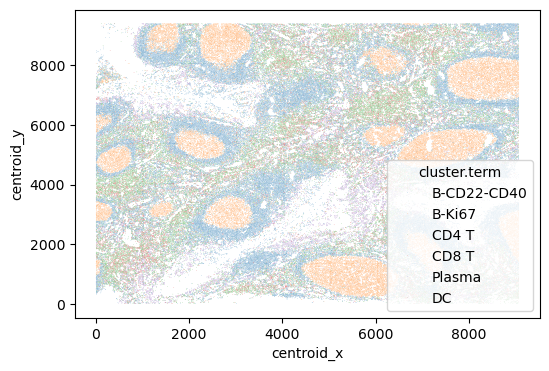

In [7]:
sns.scatterplot(data=protein, x="centroid_x", y="centroid_y", hue = "cluster.term", s = 0.2)

In [8]:
# input csv contains meta info, take only protein features
protein_features = ['CD38', 'CD19', 'CD31', 'Vimentin', 'CD22', 'Ki67', 'CD8',
       'CD90', 'CD123', 'CD15', 'CD3', 'CD152', 'CD21', 'cytokeratin', 'CD2',
       'CD66', 'collagen IV', 'CD81', 'HLA-DR', 'CD57', 'CD4', 'CD7', 'CD278',
       'podoplanin', 'CD45RA', 'CD34', 'CD54', 'CD9', 'IGM', 'CD117', 'CD56',
       'CD279', 'CD45', 'CD49f', 'CD5', 'CD16', 'CD63', 'CD11b', 'CD1c',
       'CD40', 'CD274', 'CD27', 'CD104', 'CD273', 'FAPalpha', 'Ecadherin']

protein_count = protein[protein_features].to_numpy()


In [39]:
protein.shape

(178919, 57)

In [40]:
df = protein_count
df = pd.DataFrame(df)
df.columns = protein_features
df.to_csv('data/data_mf/tonsil_protein.csv')


In [42]:
df = protein[['centroid_x','centroid_y']].to_numpy()
df = pd.DataFrame(df)
df.to_csv('data/data_mf/tonsil_location.csv')

In [9]:
protein

,Unnamed: 0.1,Unnamed: 0,cellLabelInImage,cellSize,HOECHST1,CD38,CD19,CD31,Vimentin,CD22,...,CD104,CD273,FAPalpha,Ecadherin,PointNum,cluster.term,seurat_res1.0,centroid_x,centroid_y,step
0,0,8142,1,51,6267.294118,0.143310,0.614983,0.016350,0.299605,1.000000,...,0.025635,0.026118,0.214350,0.178581,reg001_X02_Y07_Z09,B-CD22-CD40,8,1.725490,510.843137,0
1,1,8143,2,53,6805.830189,0.069681,1.000000,0.153656,1.000000,0.718178,...,0.073011,1.000000,0.338075,0.342726,reg001_X02_Y07_Z09,B-CD22-CD40,7,1.754717,881.490566,0
2,2,8144,3,57,4889.789474,0.438127,1.000000,0.044091,0.273363,0.443502,...,0.286851,1.000000,0.789193,0.340269,reg001_X02_Y07_Z09,B-Ki67,6,1.964912,1287.526316,0
3,3,8147,6,56,4450.660714,0.000000,1.000000,0.050185,0.274332,1.000000,...,0.028937,0.000000,0.166796,0.082396,reg001_X02_Y07_Z09,B-CD22-CD40,0,1.910714,660.875000,0
4,4,8148,7,79,8951.000000,0.114900,0.412287,0.039873,0.418782,0.769603,...,0.018779,0.000000,0.067358,0.166426,reg001_X02_Y07_Z09,B-CD22-CD40,4,2.291139,851.860759,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178914,178914,307664,4081,46,4188.065217,0.000000,0.516711,0.079410,0.000000,0.904165,...,0.010496,0.000000,0.000000,0.000000,reg001_X08_Y15_Z06,B-CD22-CD40,0,9069.152174,8730.326087,0
178915,178915,307665,4082,65,4169.923077,0.210978,0.034039,0.010116,0.024256,0.000000,...,0.032785,0.104098,0.257564,0.106543,reg001_X08_Y15_Z06,CD4 T,1,9069.292308,8789.384615,0
178916,178916,307666,4083,75,9355.746667,0.086992,0.020658,0.005740,0.334716,0.000000,...,0.077727,0.280892,0.638970,0.230460,reg001_X08_Y15_Z06,CD4 T,1,9068.853333,9216.053333,0
178917,178917,307667,4084,77,7284.675325,0.143877,0.785678,0.138733,0.184268,1.000000,...,0.079336,0.120146,0.439836,0.316185,reg001_X08_Y15_Z06,B-CD22-CD40,0,9068.948052,8273.857143,13


In [10]:
correspondence = pd.read_csv('data/data_mf/protein_gene_conversion.csv')

In [35]:
correspondence.head()

,Protein name,RNA name
0,CD80,CD80
1,CD86,CD86
2,CD274,CD274
3,CD273,PDCD1LG2
4,CD275,ICOSLG


In [53]:
protein_count.sum(axis = 1)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

AttributeError: 'Series' object has no attribute 'range'